In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import struct
from array import array
from os.path  import join

In [4]:
data = pd.read_csv('/home/club/ML_Practice/NPTEL/Data/digit-recognizer/train.csv')
data = np.array(data)
m, n = data.shape
print(m, n)
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape
print(X_train.shape)

42000 785
(784, 41000)


In [6]:
def init_params():
    W1 = np.random.rand(64, 784) - 0.5  # ✅ First layer: (hidden_size, input_size)
    b1 = np.random.rand(64, 1) - 0.5
    W2 = np.random.rand(10, 64) - 0.5   # ✅ Output layer: (num_classes, hidden_size)
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [7]:
def ReLU(Z):
    return np.maximum(0, Z)
def softmax(Z):
    Z -= np.max(Z, axis=0, keepdims=True)  # ✅ Normalize for numerical stability
    return np.exp(Z) / np.sum(np.exp(Z), axis=0, keepdims=True)

In [8]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [9]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [10]:
def deriv_ReLU(Z):
    return Z > 0

In [11]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [12]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2
    return W1, b1, W2, b2

In [13]:
def get_prediction(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [14]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_prediction(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [15]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 500)

Iteration:  0
[1 1 3 ... 2 2 9] [6 6 5 ... 7 4 1]
0.15104878048780487
Iteration:  10
[6 6 3 ... 7 4 5] [6 6 5 ... 7 4 1]
0.4865853658536585
Iteration:  20
[6 6 3 ... 7 4 1] [6 6 5 ... 7 4 1]
0.6061463414634146
Iteration:  30
[6 6 3 ... 7 4 1] [6 6 5 ... 7 4 1]
0.668829268292683
Iteration:  40
[6 6 3 ... 7 4 1] [6 6 5 ... 7 4 1]
0.7087560975609756
Iteration:  50
[6 6 3 ... 7 4 1] [6 6 5 ... 7 4 1]
0.7361463414634146
Iteration:  60
[6 6 3 ... 7 4 1] [6 6 5 ... 7 4 1]
0.757390243902439
Iteration:  70
[6 6 3 ... 7 4 1] [6 6 5 ... 7 4 1]
0.7728048780487805
Iteration:  80
[6 6 5 ... 7 4 1] [6 6 5 ... 7 4 1]
0.7865365853658537
Iteration:  90
[6 6 5 ... 7 4 1] [6 6 5 ... 7 4 1]
0.7970975609756098
Iteration:  100
[6 6 5 ... 7 4 1] [6 6 5 ... 7 4 1]
0.8057804878048781
Iteration:  110
[6 6 5 ... 7 4 1] [6 6 5 ... 7 4 1]
0.8129756097560975
Iteration:  120
[6 6 5 ... 7 4 1] [6 6 5 ... 7 4 1]
0.8192682926829268
Iteration:  130
[6 6 5 ... 7 4 1] [6 6 5 ... 7 4 1]
0.8248780487804878
Iteration:  140
[6

In [17]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_prediction(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


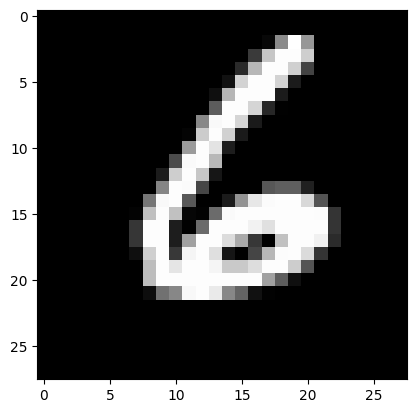

Prediction:  [6]
Label:  6


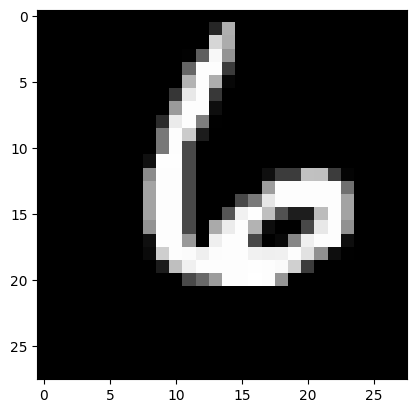

Prediction:  [5]
Label:  5


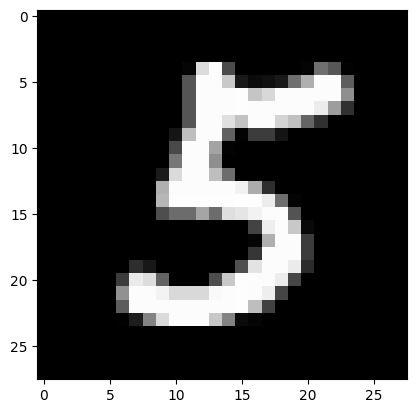

Prediction:  [1]
Label:  3


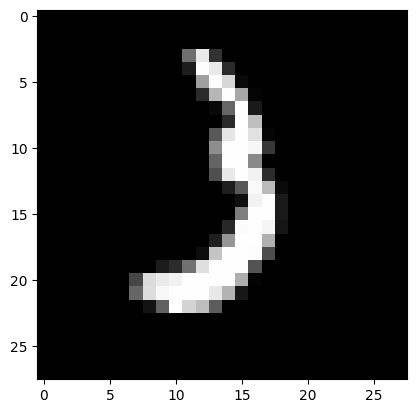

In [18]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [19]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 6 1 1 8 1 9 5 8 0 1 8 7 3 9 5 1 4 2 9 8 9 4 0 6 2 2 6 9 5 9 7 7 2 0 9 1
 2 1 4 7 1 7 4 5 0 6 0 7 2 6 5 3 7 9 1 4 0 6 0 1 8 7 0 3 2 6 4 4 0 5 3 2 8
 0 4 9 3 7 1 9 8 7 3 3 5 1 3 7 8 6 8 0 8 2 9 2 6 5 3 1 8 1 1 6 9 5 0 6 9 1
 7 5 1 2 9 0 2 8 0 1 1 1 5 3 3 5 4 0 4 3 6 8 3 7 6 7 0 3 9 1 4 1 4 5 5 9 0
 4 9 7 7 6 7 9 8 7 7 7 3 2 3 2 5 4 0 9 9 1 5 6 6 8 7 0 3 7 8 7 5 3 1 9 9 0
 5 4 8 1 2 6 2 7 8 5 8 8 5 0 3 6 7 0 1 1 0 9 9 6 5 0 7 1 2 9 7 9 7 4 1 1 5
 8 2 6 1 6 9 8 2 5 6 6 3 2 2 0 0 6 0 1 6 3 4 1 7 1 4 3 3 2 9 1 1 7 2 6 1 7
 8 5 8 1 2 7 3 8 7 9 3 0 8 5 6 8 3 0 2 2 0 5 5 6 4 3 5 8 7 3 8 7 9 4 2 6 0
 6 7 3 3 0 6 3 9 6 2 8 7 0 7 6 1 7 6 1 5 0 8 1 0 3 5 9 3 3 1 9 4 0 9 2 8 3
 7 0 6 0 5 2 5 0 4 4 5 0 6 7 2 5 4 6 9 1 6 7 3 5 6 0 3 3 6 4 9 0 4 3 7 4 2
 1 2 3 1 7 9 2 6 9 0 3 2 7 3 6 7 5 0 6 5 3 0 4 6 6 0 2 1 3 9 5 9 3 8 5 6 2
 4 3 6 1 5 1 2 7 3 3 4 1 1 7 5 8 1 9 8 6 4 1 2 7 3 0 5 1 6 7 4 8 9 9 7 1 6
 3 6 0 0 5 2 4 1 3 2 5 5 7 4 1 0 3 9 5 1 6 2 0 6 3 2 8 8 8 2 9 7 6 4 6 7 1
 8 0 0 0 0 4 4 6 8 5 0 4 

np.float64(0.891)